## Build your Deep NN: step by step
## Application: image (cat - non cat) classification
DeepLearning.ai - Course 1 - Week 4 - Andrew Ng

We have previously trained a 2-layer Neural Network (with a single hidden layer). Now, we will build a deep NN with as many layers as we want.

**Notation**:
* Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer
   * Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $l^{th}$ layer parameters
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example
   * Example: $x^{(i)}$ is the $i^{th}$ training example
* Lowerscript $i$ denotes the $i^{th}$ entry of a vector
   * Example: $a_i^{[l]}$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations

np.random.seed(1) is used to keep all the random function calls consistent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['image.interpolation'] = 'nearest'

### 1. Initialization
You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

In [2]:
def initialize_params(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    assert(W1.shape == (n_h, n_x))    # assert() is O(1)
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

In [4]:
parameters = initialize_params(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:90%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W<b> </td> 
        <td> <b>Shape of b<b>  </td> 
        <td> <b>Activation<b> </td>
        <td> <b>Shape of Activation<b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1<b> </td> 
        <td> $(n^{[1]}, 12288)$ </td> 
        <td> $(n^{[1]}, 1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]}, 209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2<b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]}, 1)$ </td> 
        <td> $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
   <tr>
        <td> <b>Layer L-1<b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td> $Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
   <tr>
        <td> <b>Layer L<b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} = W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

In [58]:
def initialize_params_deep(layer_dims):
    """
    Arguments:
    layer_dims: python array (list) containing the dimensions of each layer in our network (including the input)
    ex: layer_dims = (12288, 20, 7, 5, 1) is a 4-layer model
    """
    np.random.seed(1)
    params = {}
    L = len(layer_dims)
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        params['b' + str(l)] = np.zeros((layer_dims[l], 1))
        assert(params['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(params['b' + str(l)].shape == (layer_dims[l], 1))
    return params

In [38]:
params = initialize_params_deep([5, 4, 3])
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


### 2. Forward Propagation

In [4]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

In [27]:
# Test case
def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[ 1.62434536, -0.61175641],
                  [-0.52817175, -1.07296862],
                  [ 0.86540763, -2.3015387 ]])
    W = np.array([[1.74481176, -0.7612069 ,  0.3190391]])
    b = np.array([[-0.24937038]])
    """
    A = np.random.randn(3, 2)    # A0 is X of shape (n_x, m) = (3, 2), where m: num of samples, n_x: num of features
    W = np.random.randn(1, 3)
    b = np.random.randn(1, 1)

    return A, W, b

In [28]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [31]:
linear_cache

(array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ]]),
 array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]),
 array([[-0.24937038]]))

In [5]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z    # we will input this cache to sigmoid_backward(dA, cache)
    return A, cache

In [6]:
def relu(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    cache = Z    # we will input this cache to relu_backward(dA, cache)
    return A, cache

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    - A_prev: activations from previous layer (or input data) of shape (# nodes/units (size) of previous layer, # examples)
    - W: weights matrix of shape (size of current layer, size of previous layer)
    - b: bias vector os shape (size of current layer, 1)
    - activation: the activation to be used in this layer, stored as a text string: 'sigmoid' or 'relu'
    """
    Z, linear_cache = linear_forward(A_prev, W, b)   # linear_cache = (A_prev, W, b)
    
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)     # activation_cache = Z
        
    elif activation == 'relu':
        A, activation_cache = relu(Z)        # activation_cache = Z
        
    assert(A.shape == (W.shape[0], A_prev.shape[1]))

    cache = (linear_cache, activation_cache)

    return A, cache

### L-Layer Model
When implementing the L-layer Neural Network, you will need a function that replicates the previous one (linear_activation_forward with relu) L-1 times, then follows with one linear_activation_forward with sigmoid.

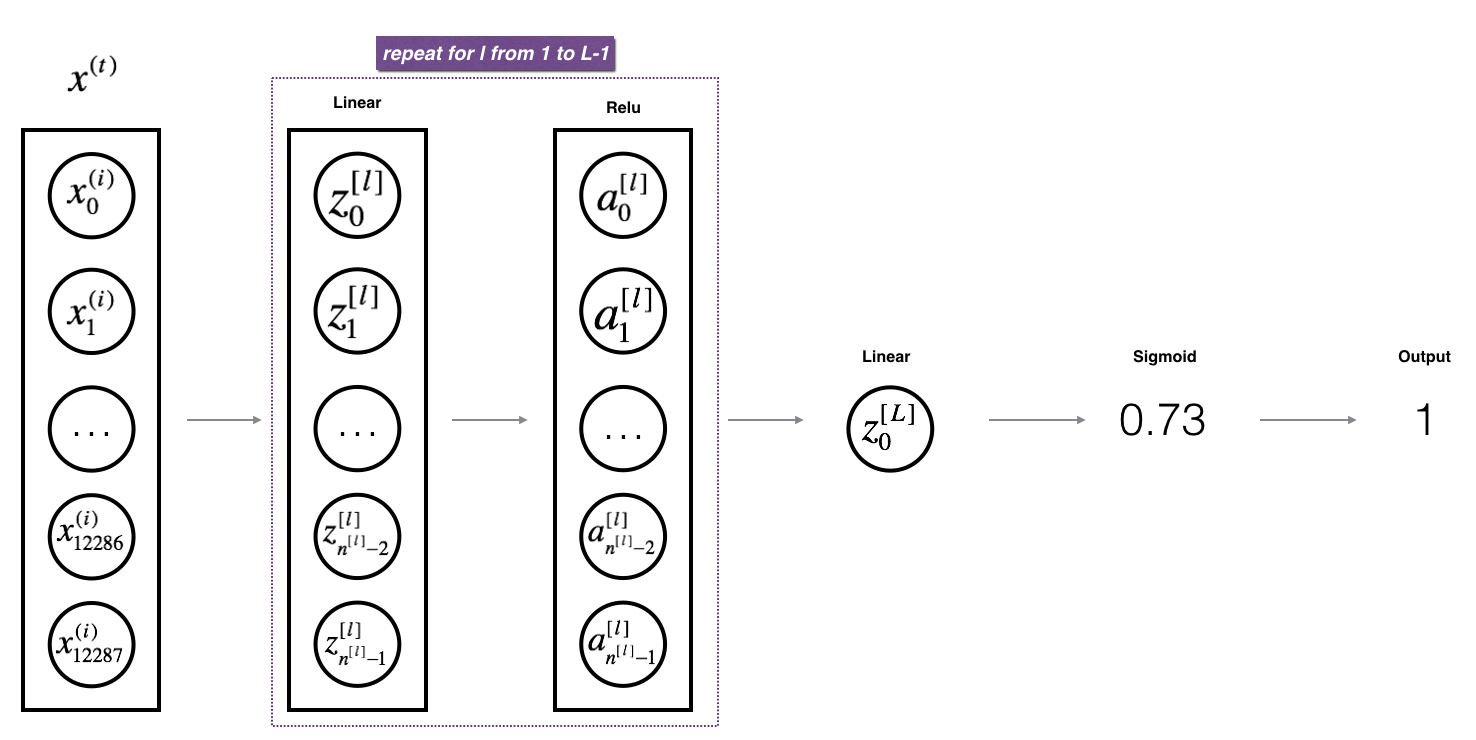

Implement the forward propagation of the above model.

In the code below, the variable AL will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]} = \hat{Y}$, where L denotes the output layer

In [8]:
def L_model_forward(X, params):
    """
    Arguments:
    - X: input data of shape (input size/#features, number of examples)
    - params: output of initialize_params_deep()
    """
    caches = []
    A = X
    L = len(params) // 2     # number of layers in NN
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, params['W' + str(l)], params['b' + str(l)], 'relu')
        caches.append(cache)

    AL, cache = linear_activation_forward(A, params['W' + str(L)], params['b' + str(L)], 'sigmoid')
    caches.append(cache)
    assert(AL.shape == (1, X.shape[1]))
    return AL, caches

In [116]:
def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5, 4)
    W1 = np.random.randn(4, 5)
    b1 = np.random.randn(4, 1)
    W2 = np.random.randn(3, 4)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1) 
    parameters = {"W1": W1, "b1": b1,
                  "W2": W2, "b2": b2,
                  "W3": W3, "b3": b3}   
    return X, parameters

In [118]:
X, params = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, params)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [46]:
params   # 5 inputs, 4 units, 3 units, 1 output where m = 4 training examples

{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
        [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
        [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
        [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
 'b1': array([[ 1.38503523],
        [-0.51962709],
        [-0.78015214],
        [ 0.95560959]]),
 'W2': array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
        [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
        [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]),
 'b2': array([[ 1.50278553],
        [-0.59545972],
        [ 0.52834106]]),
 'W3': array([[ 0.9398248 ,  0.42628539, -0.75815703]]),
 'b3': array([[-0.16236698]])}

In [55]:
AL   # of shape (1, m) where m = 4 training examples

array([[0.03921668, 0.70498921, 0.19734387, 0.04728177]])

In [53]:
caches   # contains arrays of (linear_cache, activation_cache) = ((A_prev, W, B), Z)

[((array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
          [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
          [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
          [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
          [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]]),
   array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
          [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
          [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
          [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
   array([[ 1.38503523],
          [-0.51962709],
          [-0.78015214],
          [ 0.95560959]])),
  array([[-5.23825714,  3.18040136,  0.4074501 , -1.88612721],
         [-2.77358234, -0.56177316,  3.18141623, -0.99209432],
         [ 4.18500916, -1.78006909, -0.14502619,  2.72141638],
         [ 5.05850802, -1.25674082, -3.54566654,  3.82321852]])),
 ((array([

In [54]:
print("Length of caches list = " + str(len(caches)))

Length of caches list = 3


### Cost Function
We need to compute the cost, because we want to check if our model is actually learning. Compute the cross-entropy cost J, using the following formula:
$$J = - \frac{1}{m} \; \sum_{i=1}^m \; (y^{(i)} \; log (a^{[L](i)}) + (1 - y^{(i)}) \; log (1 - a^{[L](i)}))$$

In [9]:
def compute_cost(AL, Y):
    """
    Arguments:
    - AL: probability vector corresponding to your label predictions of shape (1, m)
    - Y: true label vector of shape (1, m)
    """
    m = Y.shape[1]
    cost = -(1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    cost = np.squeeze(cost)   # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17)
    assert(cost.shape == ())
    return cost

### 3. Backward Propagation
Back propagation is used to calculate the gradient of the loss function with respect to the parameters.

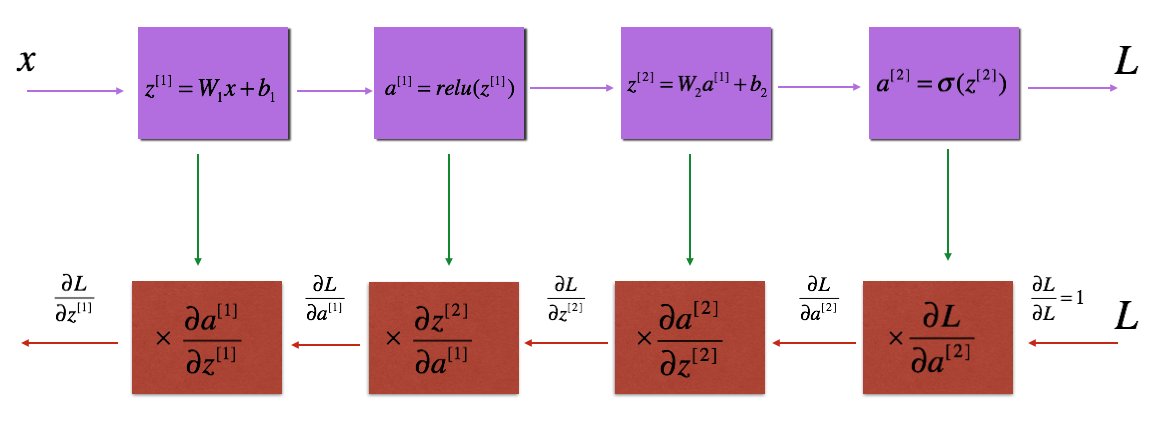

### Linear Backward
For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, \; db^{[l]}, \; dA^{[l-1]})$

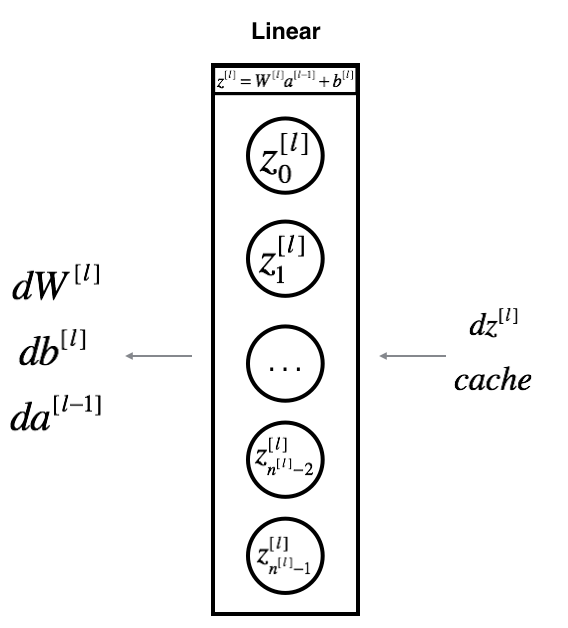

The three outputs $(dW^{[l]}, \; db^{[l]}, \; dA^{[l-1]})$ are computed using the input $dZ^{[l]}$. Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} \cdot \frac{\partial Z^{[l]}}{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

Use these 3 formulas to implement linear_backward function

In [10]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)
    Arguments:
    - dZ: gradient of the cost with respect to the linear output of current layer l
    - cache: tuple of values (A_prev, W, b) coming from the forward propagation in the current layer l
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)

    return dA_prev, dW, db

### Linear-Activation Backward

In [11]:
# 2 Helper functions
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single sigmoid unit
    Arguments:
    - dA: post activation gradient (of any shape)
    - cache: 'Z' where we stored for computing backward propagation efficiently
    Returns:
    dZ: gradient of the cost with respect to Z (dL/dZ = dL/dA * dA/dZ => vars: dZ = dA * dA_dZ)
    """
    Z = cache
    A = 1 / (1 + np.exp(-Z))
    dA_dZ = A * (1 - A)
    dZ = dA * dA_dZ
    assert(dZ.shape == Z.shape)
    return dZ

def relu_backward(dA, cache):    # same functionality as the one below with one less multiplication operation
    """
    Implement the backward propagation for a single relu unit
    """
    Z = cache
    dZ = np.array(dA, copy=True)

    # when Z <= 0, we should set dZ to 0 as well
    dZ[Z <= 0] = 0

    assert(dZ.shape == Z.shape)
    return dZ

# def relu_backward(dA, cache):
#     """
#     Implement the backward propagation for a single relu unit
#     Arguments:
#     - dA: post activation gradient (of any shape)
#     - cache: 'Z' where we stored for computing backward propagation efficiently
#     Returns:
#     dZ: gradient of the cost with respect to Z (dL/dZ = dL/dA * dA/dZ => vars: dZ = dA * dA_dZ)
#     """
#     Z = cache

#     dA_dZ = np.ones_like(dA)

#     # derivative of relu is 1 if Z > 0; 0 otherwise
#     dA_dZ[Z <= 0] = 0

#     dZ = dA * dA_dZ

#     assert(dZ.shape == Z.shape)
#     return dZ

In [13]:
def linear_activation_backward(dA, cache, activation):
    """
    Arguments:
    - dA: post-activation gradient for the current layer l
    - cache: tuple of values (linear_cache, activation_cache) that we stored when computing linear_activation_forward()
             linear_cache = (A_prev, W, b), activation_cache = Z
    - activation: the activation to be used in this layer, stored as text string: 'sigmoid' or 'relu'
    """
    linear_cache, activation_cache = cache
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

### L-Model Backward
Now we will implement the backward function for the whole network. Recall that when we implemented the L_model_forward function, at each iteration, we stored a cache which contains (linear_cache, activation_cache) = ((A_prev, W, b), Z). In the back propagation module, we will use those variables to compute the gradients. Therefore, in the L_model_backward function, we will iterate through all the hidden layer backward, starting from layer L. On each step, we will use the cached values for layer l to backpropagate through layer l.

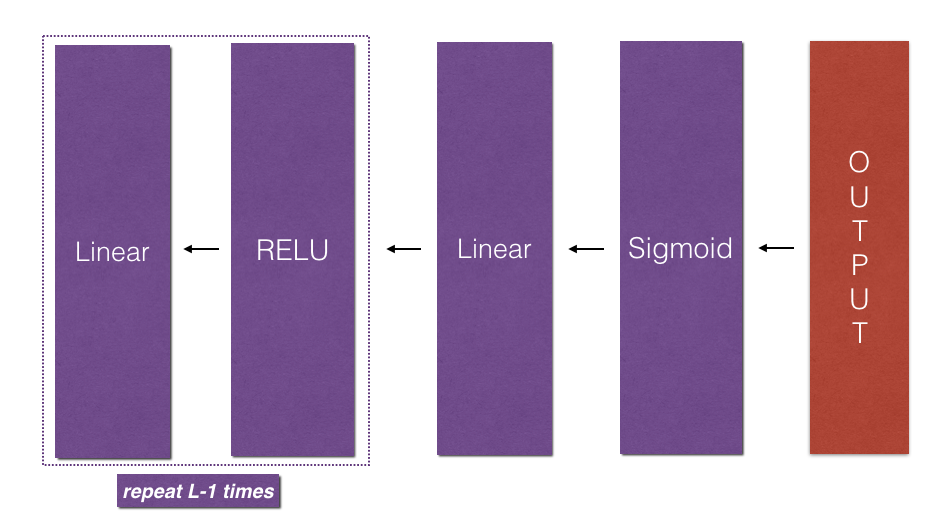

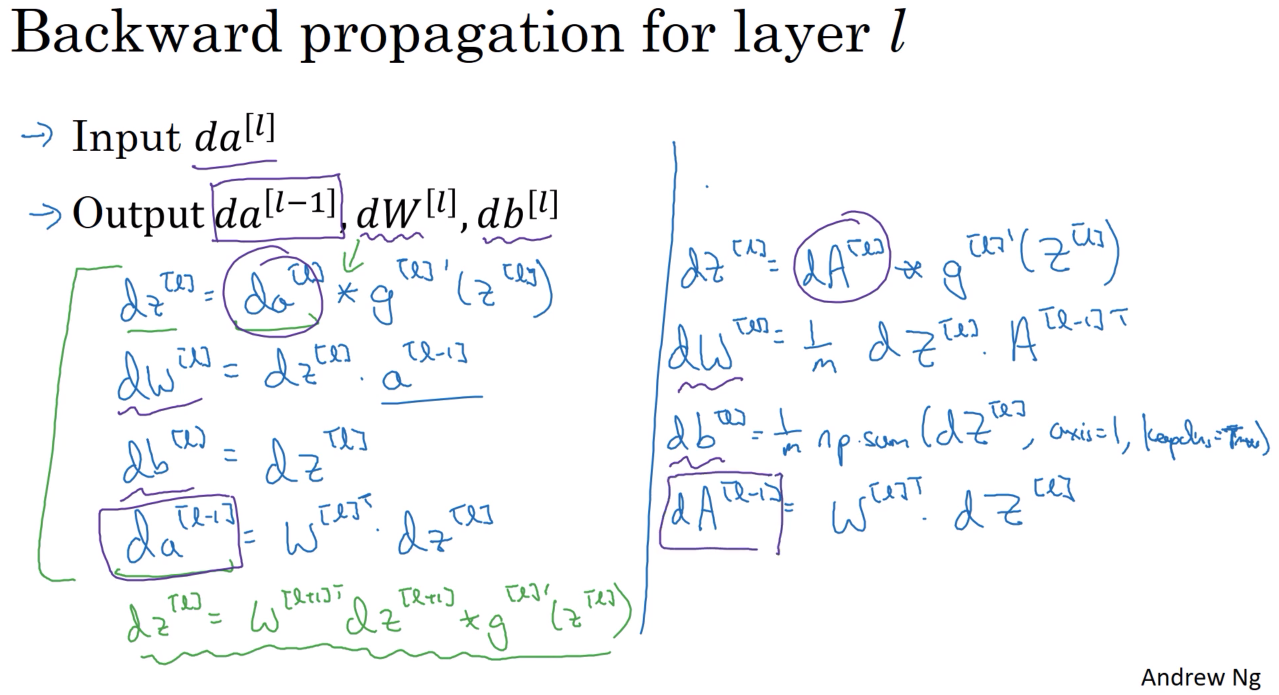

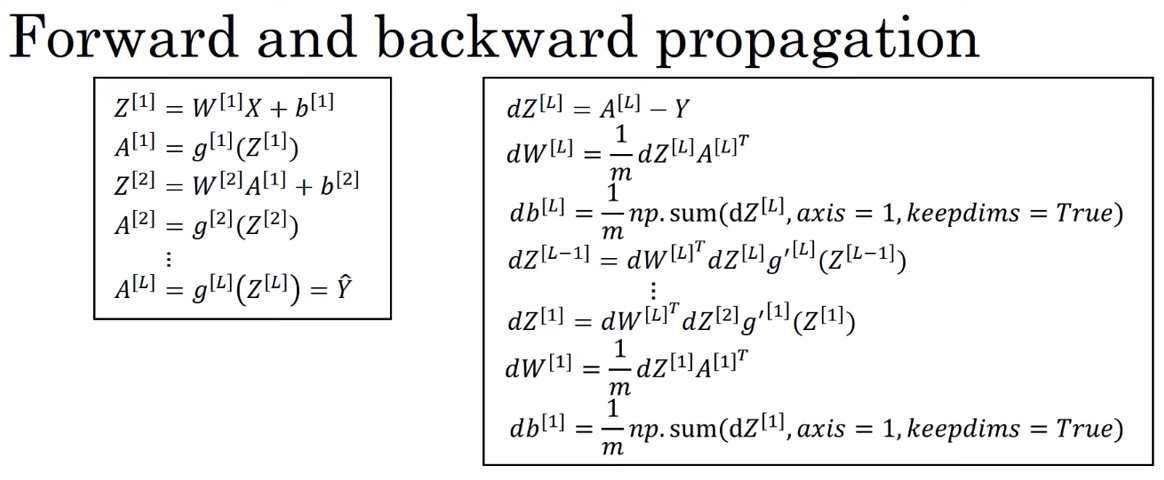

**Initializing backpropagation**:

To backpropagate through this network, we know that the output is: $A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute  `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.

To do so, use this formula (**derivative of the binary cross-entropy loss function**):
$$\mathcal{L}(AL, Y) = -(Y \cdot log(AL) + (1 - Y) \cdot log(1 - AL))$$
$$\frac{\partial \mathcal{L}}{\partial AL} = - (\frac{Y}{AL} - \frac{1 - Y}{1 - AL})$$

```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
```

We can then use this post-activation gradient `dAL` to keep going backward. We can now feed in `dAL` into the LINEAR -> SIGMOID backward function we implemented (using the cached values stored by the L_model_forward function). After that, we will have to use a `for` loop to iterate through all the other layers using the LINEAR -> RELU backward function. We should store each dA, dW, and db in the grads dictionary.

In [29]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward(dAL, caches[L-1], 'sigmoid')
    
    for l in reversed(range(L-1)):
        grads['dA'+str(l)], grads['dW'+str(l+1)], grads['db'+str(l+1)] = linear_activation_backward(grads['dA'+str(l+1)], caches[l], 'relu')

    return grads

In [30]:
def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"])) 

AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


### Update Parameters
Implement update_params() using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$

In [15]:
def update_params(params, grads, lr):
    """
    Arguments:
    - params: dictionary containing W and b
    - grads: dictionary containing gradients, the returns from L_model_backward()
    Returns:
    params: dictionary containing your updated parameters
    """
    L = len(params) // 2
    for l in range(L):
        params['W'+str(l+1)] -= lr * grads['dW'+str(l+1)]
        params['b'+str(l+1)] -= lr * grads['db'+str(l+1)]
    return params

## Application: Deep NN for Image Classification

In [16]:
import h5py
from PIL import Image
from scipy import ndimage

In [17]:
def load_catvnoncat_data():
    train = h5py.File('train_catvnoncat.h5', 'r')
    train_x_orig = np.array(train['train_set_x'][:])
    train_y_orig = np.array(train['train_set_y'][:]).reshape((1, train_x_orig.shape[0]))

    test = h5py.File('test_catvnoncat.h5', 'r')
    test_x_orig = np.array(test['test_set_x'][:])
    test_y_orig = np.array(test['test_set_y'][:]).reshape((1, test_x_orig.shape[0]))

    classes = np.array(test['list_classes'][:])

    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

In [33]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_catvnoncat_data()

In [34]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


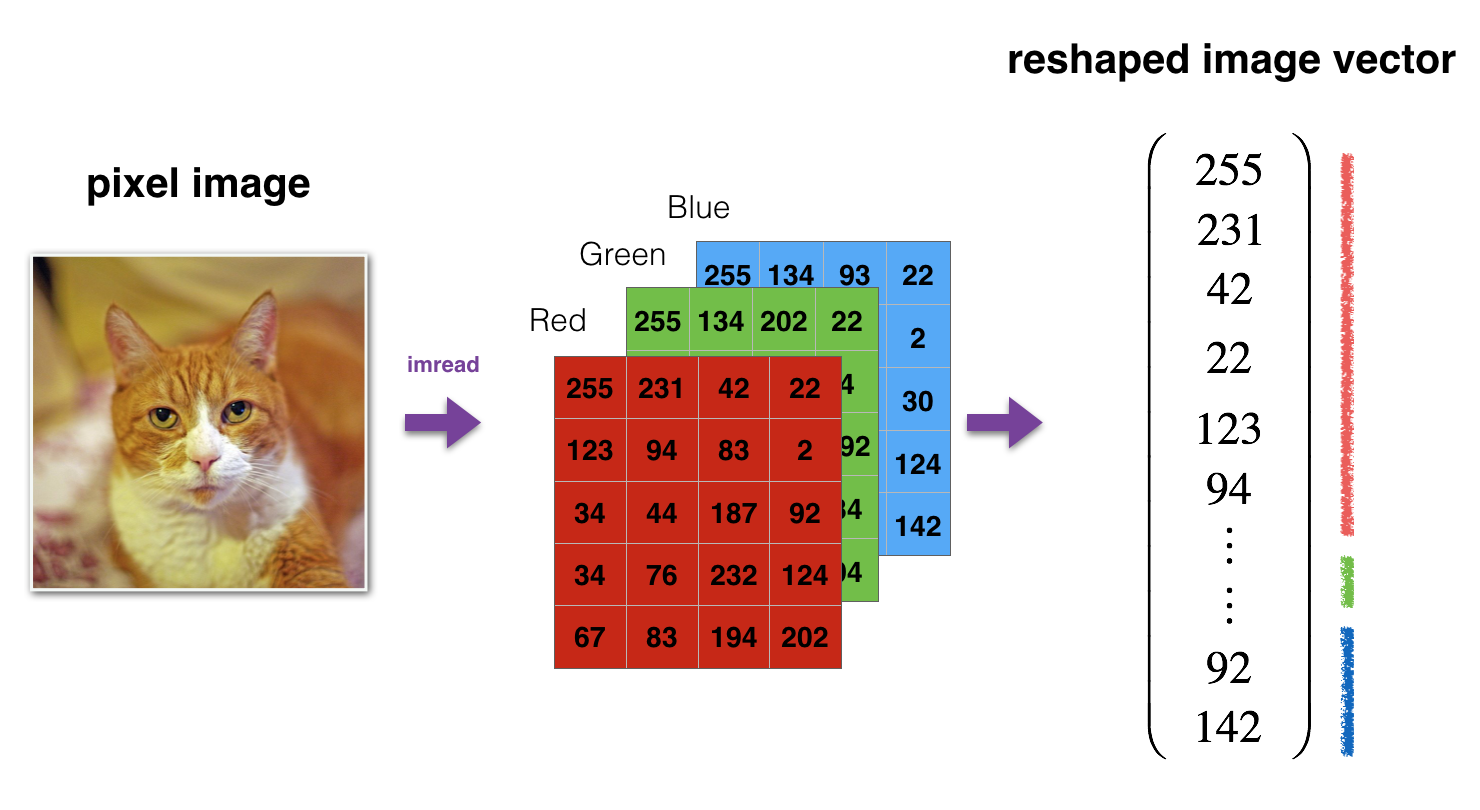

In [35]:
train_x_flatten = train_x_orig.reshape(m_train, -1)   # -1 makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(m_test, -1)

In [36]:
train_x_flatten.shape

(209, 12288)

In [37]:
train_x_flatten = train_x_flatten.T
test_x_flatten = test_x_flatten.T

# scale data to have feature values between 0 and 1
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [38]:
train_x.shape

(12288, 209)

### 2-Layer Neural Network

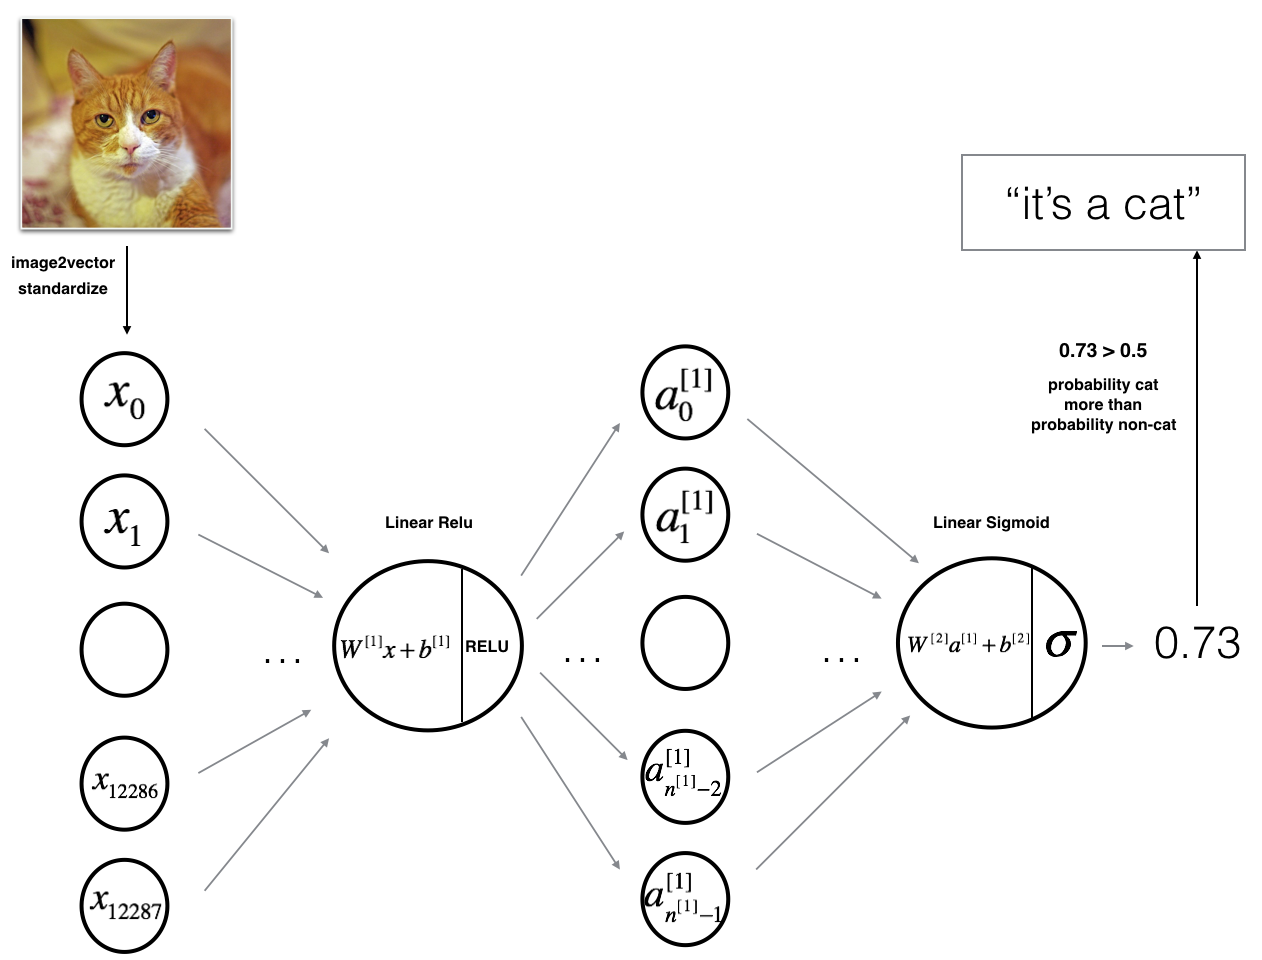

In [39]:
# constants defining the model
n_x = num_px*num_px*3
n_h = 7     # number of hidden units/nodes
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [49]:
def two_layer_model(X, Y, layer_dims, lr=0.0075, n_iters=3000, print_cost=False):
    """
    Implement a 2-layer NN: linear -> relu -> linear -> sigmoid
    Returns:
    params: dictionary containing W1, b1, W2, b2
    """
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    n_x, n_h, n_y = layer_dims
    params = initialize_params(n_x, n_h, n_y)
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    for i in range(n_iters):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        cost = compute_cost(A2, Y)

        # initialize backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1-Y, 1-A2))

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'], grads['db1'] = dW1, db1
        grads['dW2'], grads['db2'] = dW2, db2
        
        params = update_params(params, grads, lr)

        # retrieve updated parameters
        W1, b1 = params['W1'], params['b1']
        W2, b2 = params['W2'], params['b2']

        # print cost every 100 training example if True
        if print_cost and i % 100 == 0:
            print('Cost after iteration {}: {}'.format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)

    # plot the cost if print_cost is True
    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title('learning rate:' + str(lr))
        plt.show()
    return params

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912676
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764732
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225751
Cost after iteration 800: 0.40079775362038833
Cost after iteration 900: 0.35807050113237926
Cost after iteration 1000: 0.3394281538366415
Cost after iteration 1100: 0.30527536361962704
Cost after iteration 1200: 0.27491377282130214
Cost after iteration 1300: 0.24681768210614766
Cost after iteration 1400: 0.19850735037466158
Cost after iteration 1500: 0.1744831811255641
Cost after iteration 1600: 0.1708076297809553
Cost after iteration 1700: 0.11306524562164781
Cost after iteration 1800: 0.09629426845937147
Cost after iteration 1900: 0.08342617959726903
Cost after iteration 2000: 0.07439078704319099
Cost after iteration 2100: 0.06630748

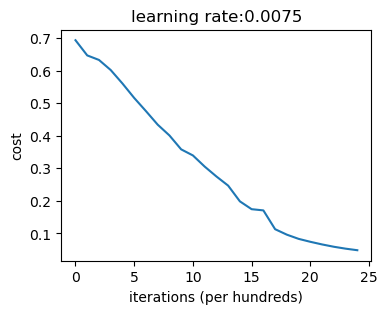

In [44]:
parameters = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), n_iters = 2500, print_cost=True)

In [25]:
def predict(X, y, params):
    """
    This function is used to predict the results of a  L-layer neural network.   
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    """
    
    m = X.shape[1]
    
    # Forward propagation
    probas, caches = L_model_forward(X, params)
    
    # convert probas to 0/1 predictions
    y_hat = (probas > 0.5).astype(int)
    
    print("Accuracy: "  + str(np.sum((y_hat == y)/m)))
        
    return y_hat

In [46]:
y_preds_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [47]:
y_preds_test = predict(test_x, test_x, parameters)

Accuracy: 79.54000000000002


In [55]:
parameters = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), n_iters = 1700, print_cost=False)
y_preds_test = predict(test_x, test_x, parameters)

Accuracy: 80.60000000000002


**Note**: You may notice that running the model on fewer iterations (say 1700) gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting.

### L-Layer Deep Neural Network

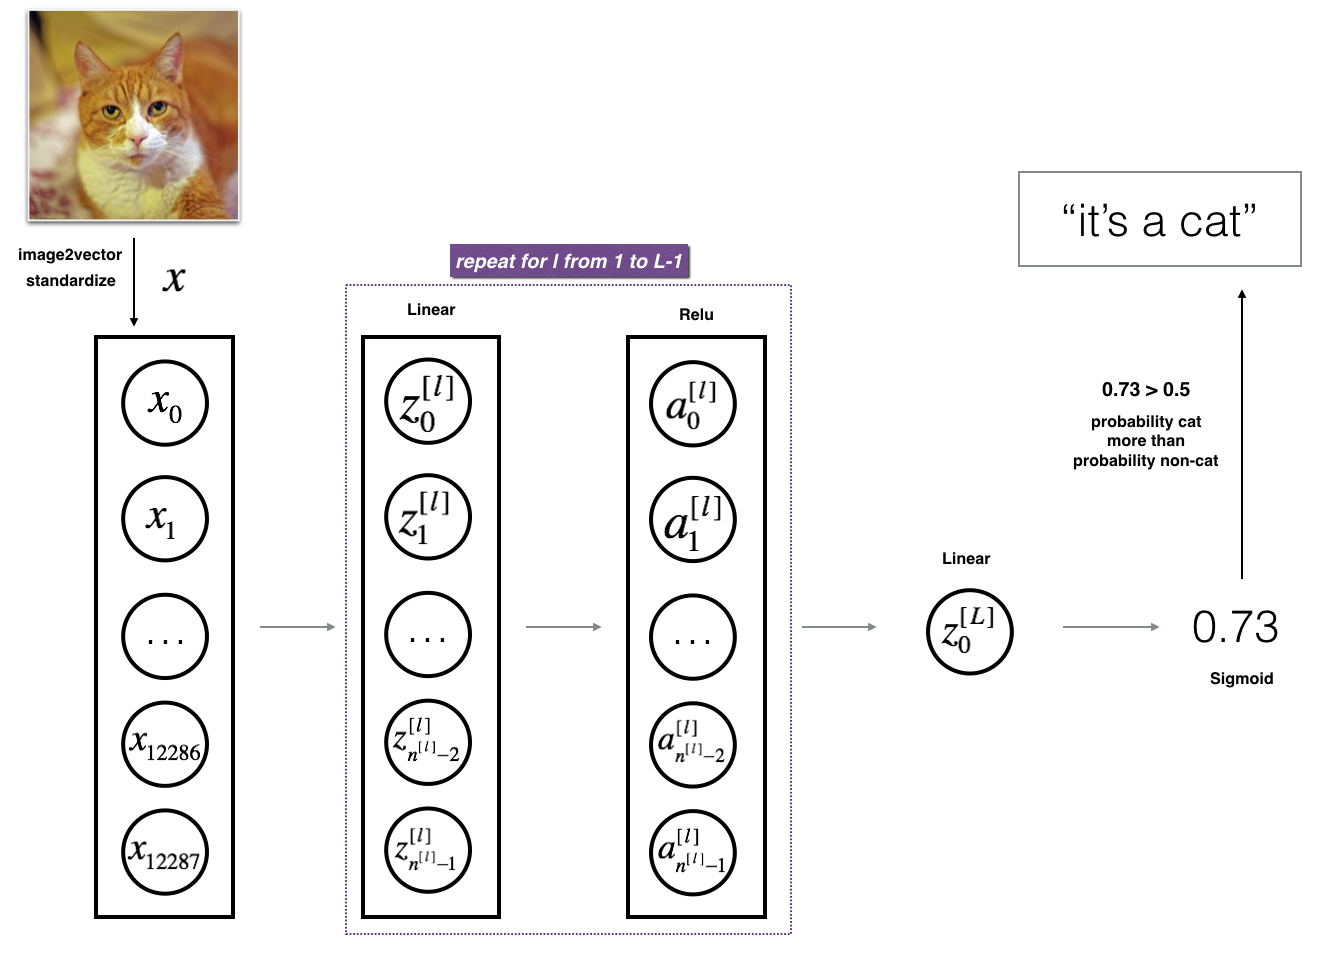

In [55]:
# constants defining the model: 4-layer model
layer_dims = (12288, 20, 7, 5, 1)

In [56]:
def L_layer_model(X, Y, layer_dims, lr=0.0075, n_iters=3000, print_cost=False):
    """
    Returns: parameters learnt by the model, that can be use to make prediction
    """
    np.random.seed(1)
    costs = []
    params = initialize_params_deep(layer_dims)
    for i in range(n_iters):
        AL, caches = L_model_forward(X, params)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        params = update_params(params, grads, lr)

        if print_cost and i % 100 == 0:
            print('Cost after iteration {}: {}'.format(i, cost))
        if i % 100 == 0:
            costs.append(cost)

    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title('learning rate: ' + str(lr))
        plt.show()

    return params

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575213
Cost after iteration 300: 0.6115068816101356
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455269
Cost after iteration 700: 0.46547737717668525
Cost after iteration 800: 0.3691258524959279
Cost after iteration 900: 0.3917469743480533
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789389
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463294
Cost after iteration 1500: 0.16118854665827753
Cost after iteration 1600: 0.14821389662363324
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190114
Cost after iteration 1900: 0.12122535068005208
Cost after iteration 2000: 0.11382060668633705
Cost after iteration 2100: 0.107839285

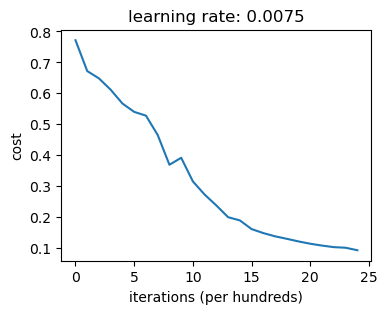

In [61]:
params = L_layer_model(train_x, train_y, layer_dims, n_iters=2500, print_cost=True)

In [62]:
pred_test = predict(test_x, test_y, params)   # n_iters=2500

Accuracy: 0.8


In [68]:
params = L_layer_model(train_x, train_y, layer_dims, n_iters=1500, print_cost=False)

In [69]:
pred_test = predict(test_x, test_y, params)   # n_iters=1500

Accuracy: 0.8200000000000001


In [89]:
def plot_mislabeled_img(classes, X, y, y_preds):
    """
    Plots images where predictions and truth are different
    """
    a = y_preds + y
    mislabeled_indices = np.where(a == 1)[1]
    n_img = len(mislabeled_indices)
    plt.figure(figsize=(20, 20))
    for i in range(n_img):
        idx = mislabeled_indices[i]
        plt.subplot(2, n_img, i+1)
        plt.imshow(X[:, idx].reshape(64, 64, 3), interpolation='nearest')
        plt.axis('off')
        plt.title('Predict:' + classes[int(y_preds[0, idx])].decode('utf-8') + '\nActual:' + classes[y[0, idx]].decode('utf-8'))

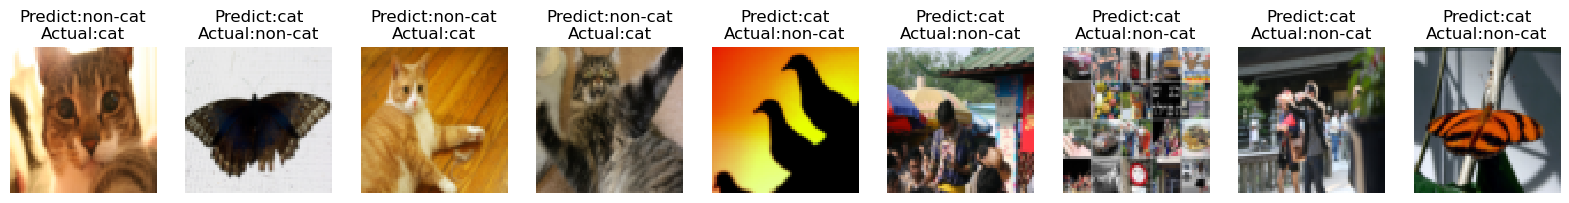

In [90]:
plot_mislabeled_img(classes, test_x, test_y, pred_test)

A few types of images the model tends to do poorly include:
* Cat body in an unusual position
* Cat appears against a background of a similar color
* Unusual cat color and species
* Camera Angle
* Brightness of the picture
* Scale variation (cat is very large or small in image)